In [1]:
!pip install torchvision==0.2.2

In [20]:
!pip3 install matplotlib

    100% |████████████████████████████████| 12.5MB 4.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 71kB 16.4MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/df/93/8bc9b52a8846be2b9572aa0a7c881930939b06e4abe1162da6a0430b794f/kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 15.1MB 3.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl


In [1]:
from pathlib import Path
import json
import pdb
import collections
import os
path = Path()

# Combining Scraped Data

## URLS

In [2]:
%cd tutorial
!ls

/Users/bradleybrown/Desktop/COCOUI/scraper/tutorial
COCOUI2.json                   annotations4(25740-33426).json
__init__.py                    annotations4(26468-32631).json
__pycache__                    annotations4(32866-33426).json
all_urls.json                  annotations4(5740-10740).json
all_urls2.json                 annotations4(6398-10740).json
all_urls3.json                 annotations4(725-1357).json
all_urls4.json                 annotations4(725-33426).json
annotations2                   annotations4(8229-10740).json
annotations2(10700-10800).json data2
annotations2(10800-10900).json data3
annotations2(10900-10952).json data4
annotations3(0-1000).json      items.py
annotations3(1-13790).json     middlewares.py
annotations3(10001-13750).json pipelines.py
annotations3(1032-13790).json  scraper
annotations3(1400-2000).json   settings.py
annotations3(1530-2000).json   spiders
annotations3(2000-3000).json   urls.json
annotations3(2130-3000).json   urls10.json
annotations3(2

In [2]:
#we use urls for annotations 1 and urls2 for annotations2
path = Path()
urls6 = json.load((path/'urls3-1.json').open())
urls7 = json.load((path/'urls3-2.json').open())
urls8 = json.load((path/'urls3-3.json').open())
urls9 = json.load((path/'urls3-4.json').open())

In [6]:
len(urls6)

44378

In [7]:
seen_urls = set()
all_urls = []
url_groups =[urls6, urls7, urls8, urls9]
for urls in url_groups:
    for url in urls:
        if url not in seen_urls:
            all_urls.append(url)
            seen_urls.add(url)
len(all_urls)

262090

In [8]:
with open("all_urls5.json", 'w') as fp:
    json.dump(all_urls, fp)

# V2

In [3]:
%cd tutorial

/Users/bradleybrown/Desktop/COCOUI/scraper/tutorial


In [5]:
urls3 = json.load((path/'urls3.json').open())
urls4 = json.load((path/'urls4.json').open())

In [6]:
len(urls3), len(urls4)

(2719, 8553)

In [8]:
seen_urls = set()
all_urls2 = []
for url in urls3:
    if url not in seen_urls:
        all_urls2.append(url)
        seen_urls.add(url)
for url in urls4:
    if url not in seen_urls:
        all_urls2.append(url)
        seen_urls.add(url)
len(all_urls2)

10952

In [10]:
with open("all_urls2.json", 'w') as fp:
    json.dump(all_urls2, fp)

## Annotations

In [14]:
tot_annot = []
import glob, os
for file in glob.glob("annotations3*"):
    annot = json.load((path/file).open())
    print(len(annot))
    tot_annot.extend(annot)
    
print(f'Final Length: {len(tot_annot)}')

4439
283
747
92
3194
266
106
322
644
112
381
115
100
Final Length: 10801


In [14]:
tot_annot = []
for i in range(0,109):
    if i == 25 or i ==79: continue
    name = 'annotations2(' + str(i*100) + '-' + str(i*100+100) + ').json'
    annot = json.load((path/name).open())
    print(len(annot))
    tot_annot.extend(annot)
    
print(f'Final Length: {len(tot_annot)}')

19
15
20
11
32
23
25
35
21
15
13
4
14
14
22
23
37
22
8
10
4
16
15
26
35
22
18
14
10
21
14
14
13
2
32
20
27
18
20
21
21
24
11
15
22
18
18
23
14
13
14
19
26
20
0
0
0
18
4
13
25
21
35
28
17
12
27
9
14
23
18
13
19
12
20
15
18
20
18
6
24
16
29
28
32
5
6
14
22
9
16
13
15
7
6
5
13
18
7
6
22
16
23
5
8
1
3
Final Length: 1777


In [6]:
for page in tot_annot[:20]:
    im = open_image(path/'data'/page['filename'])
    print(im.shape)

NameError: name 'open_image' is not defined

In [19]:
tot_annot_with_screenshot = []
seen_filenames = {}
for page in tot_annot:
    filename = page['filename']
    if filename not in seen_filenames: seen_filenames[filename] = 1
    if os.path.exists(path/'data3'/filename): tot_annot_with_screenshot.append(page)

In [20]:
len(tot_annot_with_screenshot)

10744

In [21]:
with open("COCOUI3.json", 'w') as fp:
    json.dump(tot_annot, fp)

# Visualizing Data

In [5]:
tot_annot = json.load((path/"COCOUI.json").open())

In [6]:
len(tot_annot)

3082

In [31]:
jpgs = Path()/'data'

In [70]:
trn_fns = {page["id"]: page["filename"] for page in tot_annot}
cats = {1: "buttons", 2: "input", 3: "select", 4: "big heading", 
        5: "paragraphs", 6:"checkbox", 7: "above input", 8: "a", 9: "image", 10: "form",
       11: "legend", 12: "field", 13: "lists", 14: "list element", 15: "div", 16: "small heading"}

In [33]:
def get_bb(coords): 
    return np.array([coords['top'], coords['left'], coords['bottom'], coords['right']])

In [52]:
tot_annot[0]['entities']['1']

{'coords': []}

In [65]:
trn_anno = collections.defaultdict(lambda:[])
for i,img_annotations in enumerate(tot_annot):
    for class_idx,coord_list in img_annotations['entities'].items():
        if len(coord_list) == 0: continue
        if len(coord_list['coords']) > 0:
            for coord in coord_list['coords']:
                bb = get_bb(coord)
                trn_anno[img_annotations['id']].append((bb,int(class_idx)))

In [66]:
len(trn_anno)

1803

In [71]:
len(trn_fns)

1897

torch.Size([3, 768, 1024])


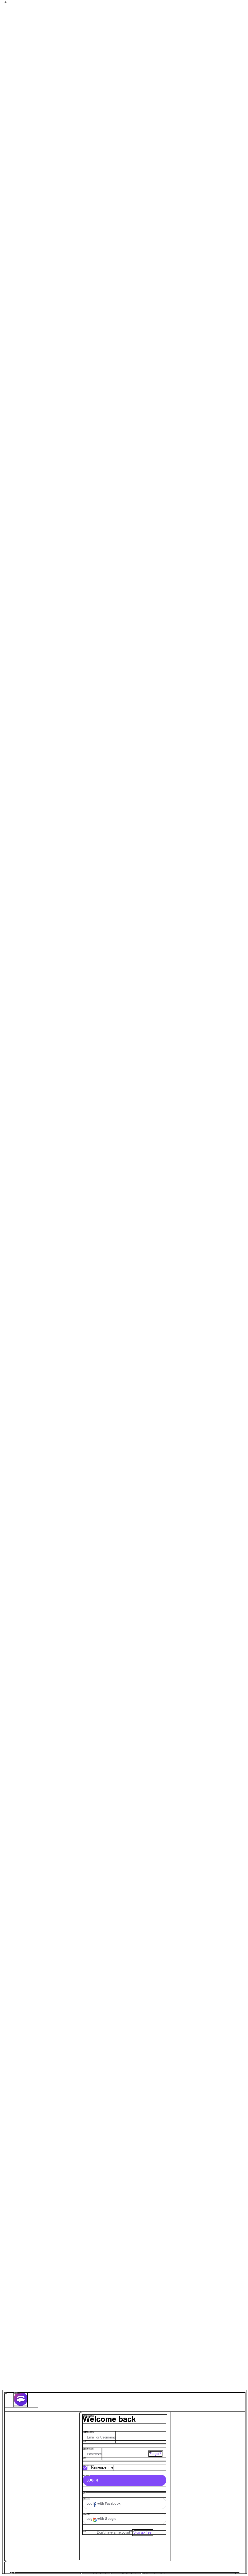

In [72]:
draw_idx(1, trn_anno, trn_fns, cats, jpgs)

torch.Size([3, 768, 1024])


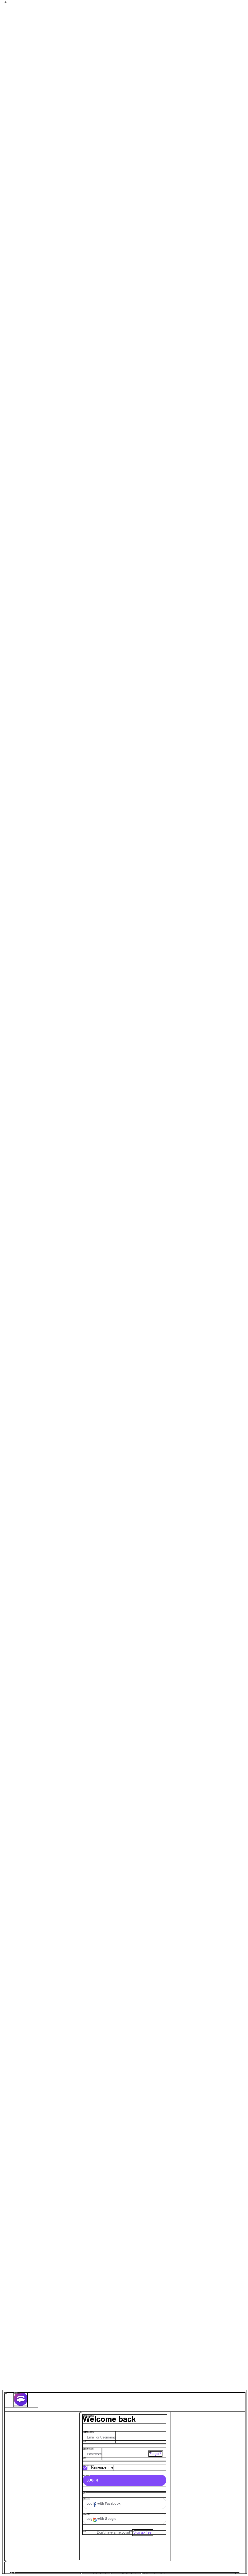

In [73]:
draw_idx(1, trn_anno, trn_fns, cats, jpgs)

torch.Size([3, 768, 1024])


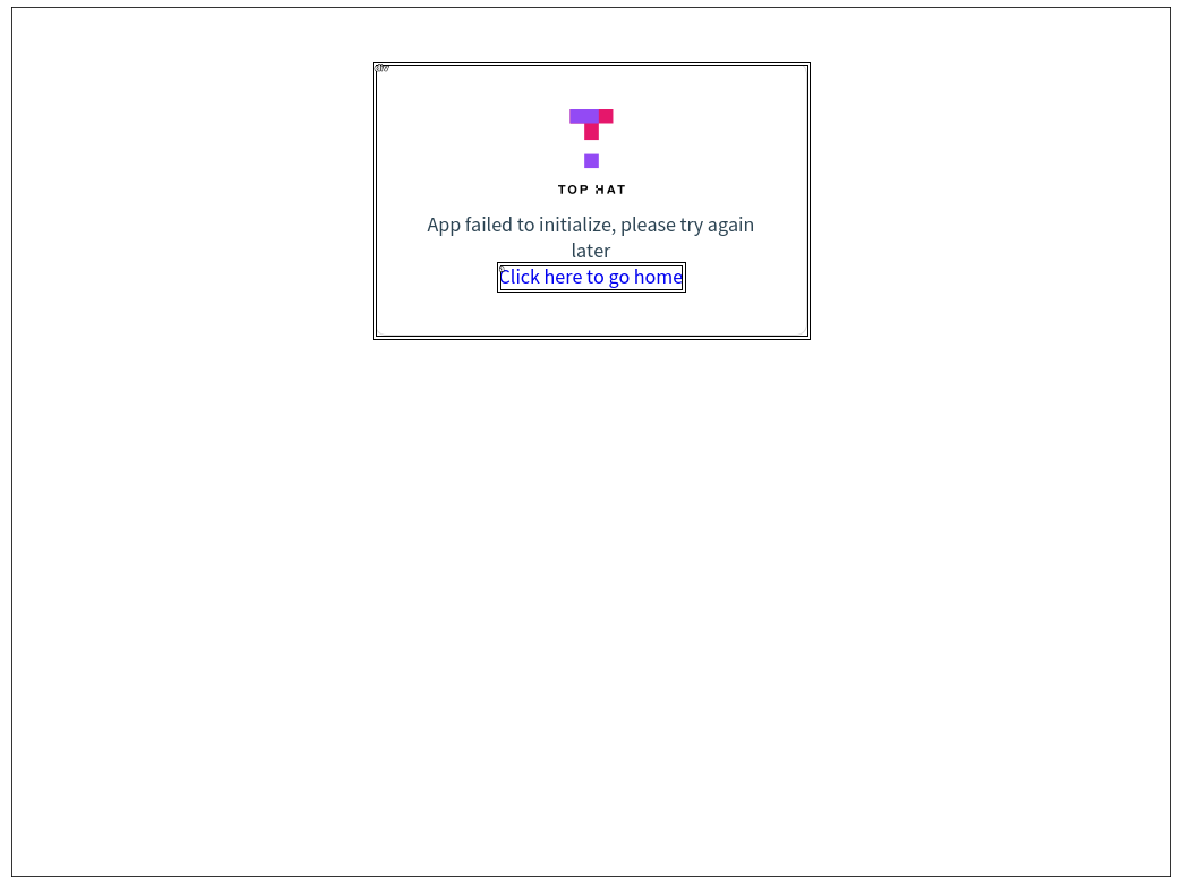

In [74]:
draw_idx(2, trn_anno, trn_fns, cats, jpgs)

torch.Size([3, 768, 1024])


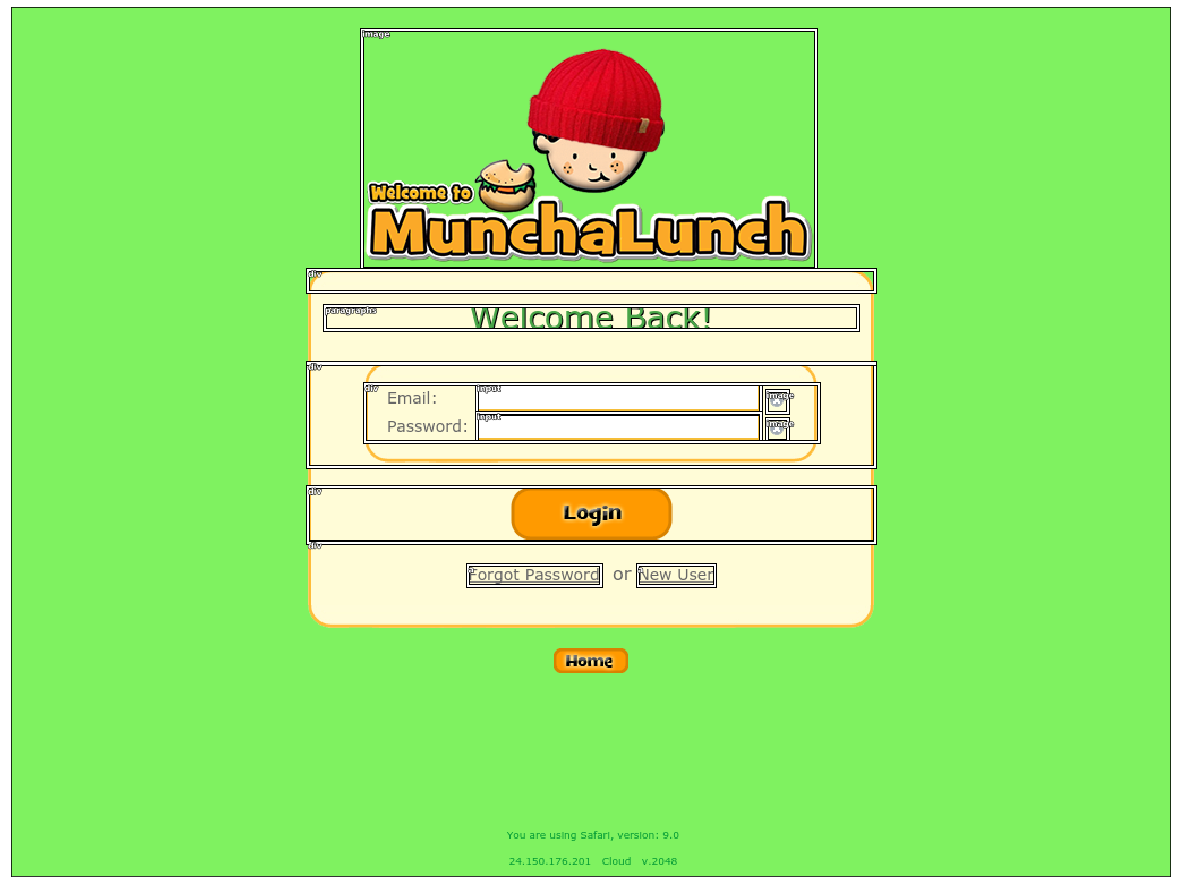

In [75]:
draw_idx(3, trn_anno, trn_fns, cats, jpgs)

torch.Size([3, 768, 1024])


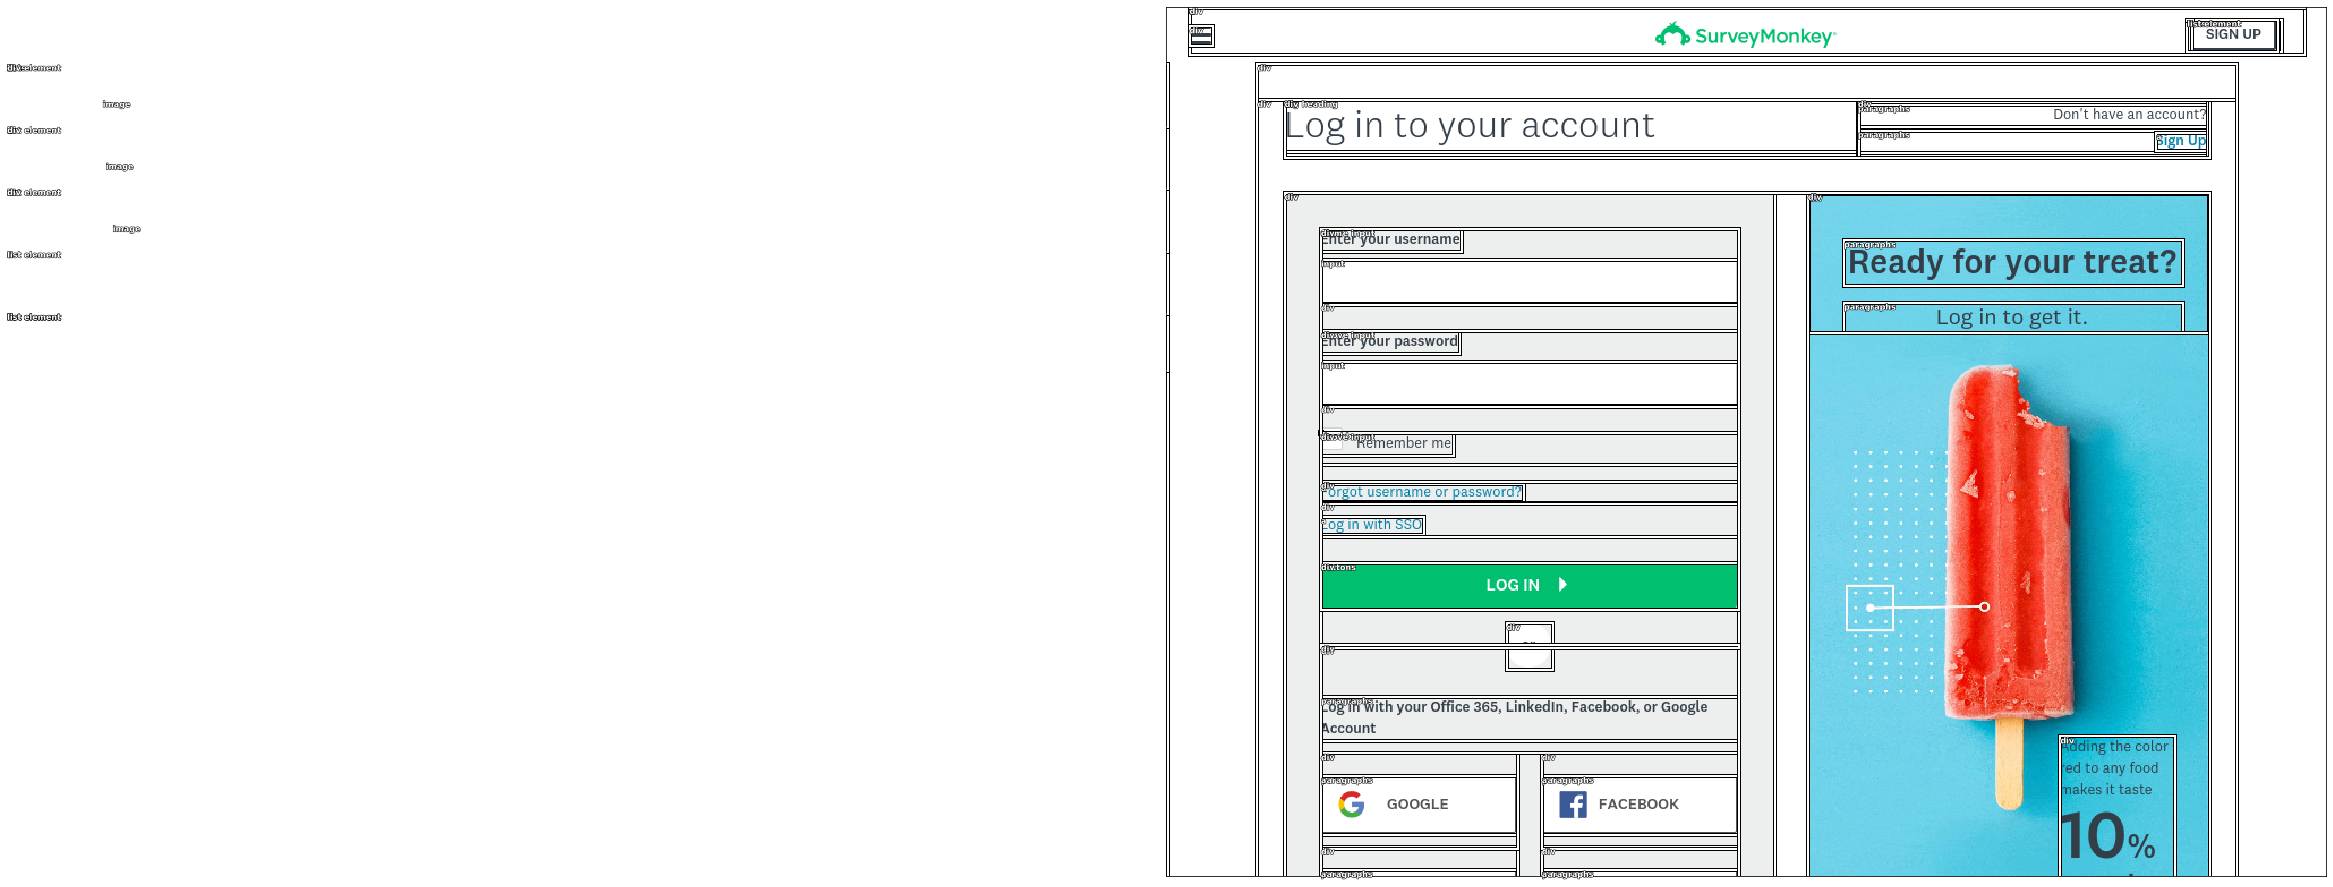

In [76]:
draw_idx(4, trn_anno, trn_fns, cats, jpgs)

In [77]:
trn_anno[5]

[(array([233, 362, 282, 662]), 1),
 (array([179, 362, 228, 662]), 1),
 (array([369, 362, 401, 662]), 2),
 (array([438, 362, 470, 662]), 2),
 (array([417, 362, 433, 662]), 7),
 (array([348, 362, 364, 662]), 7),
 (array([563.     , 546.90625, 576.     , 593.25   ]), 8),
 (array([478.      , 362.      , 491.      , 467.703125]), 8),
 (array([   8.      ,  914.71875 ,   63.      , 1002.515625]), 8),
 (array([  8.     , 842.625  ,  63.     , 914.71875]), 8),
 (array([  8.      , 758.671875,  63.      , 840.625   ]), 8),
 (array([  7.      , 660.8125  ,  64.      , 758.671875]), 8),
 (array([  7.      , 559.453125,  64.      , 660.8125  ]), 8),
 (array([  7.      , 463.046875,  64.      , 559.453125]), 8),
 (array([  7.      , 349.640625,  64.      , 463.046875]), 8),
 (array([  8.      , 245.984375,  63.      , 349.640625]), 8),
 (array([  8.      ,  28.484375,  63.      , 184.484375]), 8),
 (array([460.      ,  30.484375, 697.      , 340.484375]), 9),
 (array([563, 362, 563, 662]), 10),
 (

torch.Size([3, 768, 1024])


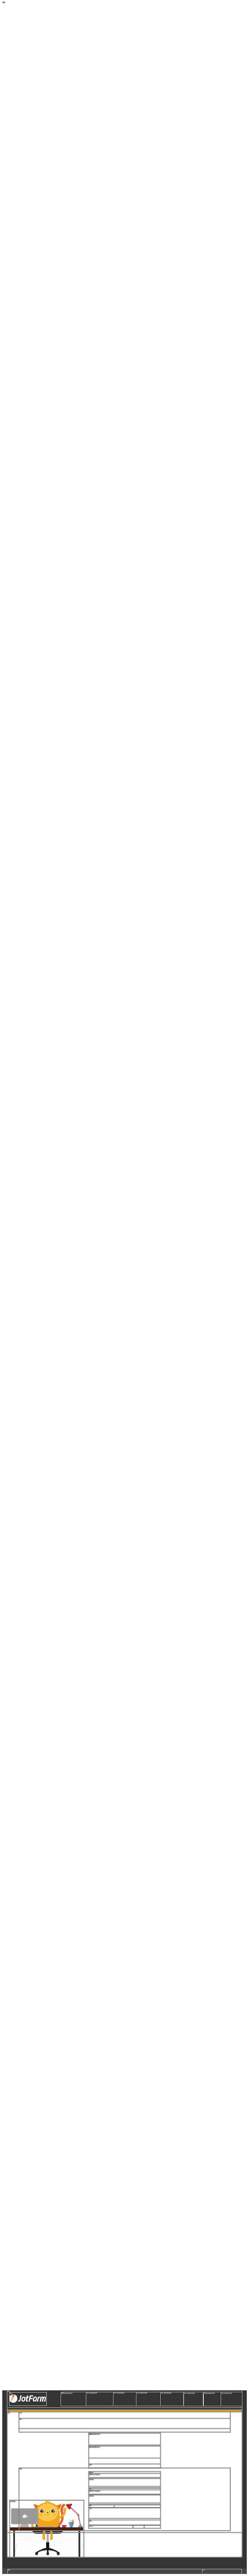

In [78]:
draw_idx(5, trn_anno, trn_fns, cats, jpgs)

torch.Size([3, 768, 1024])


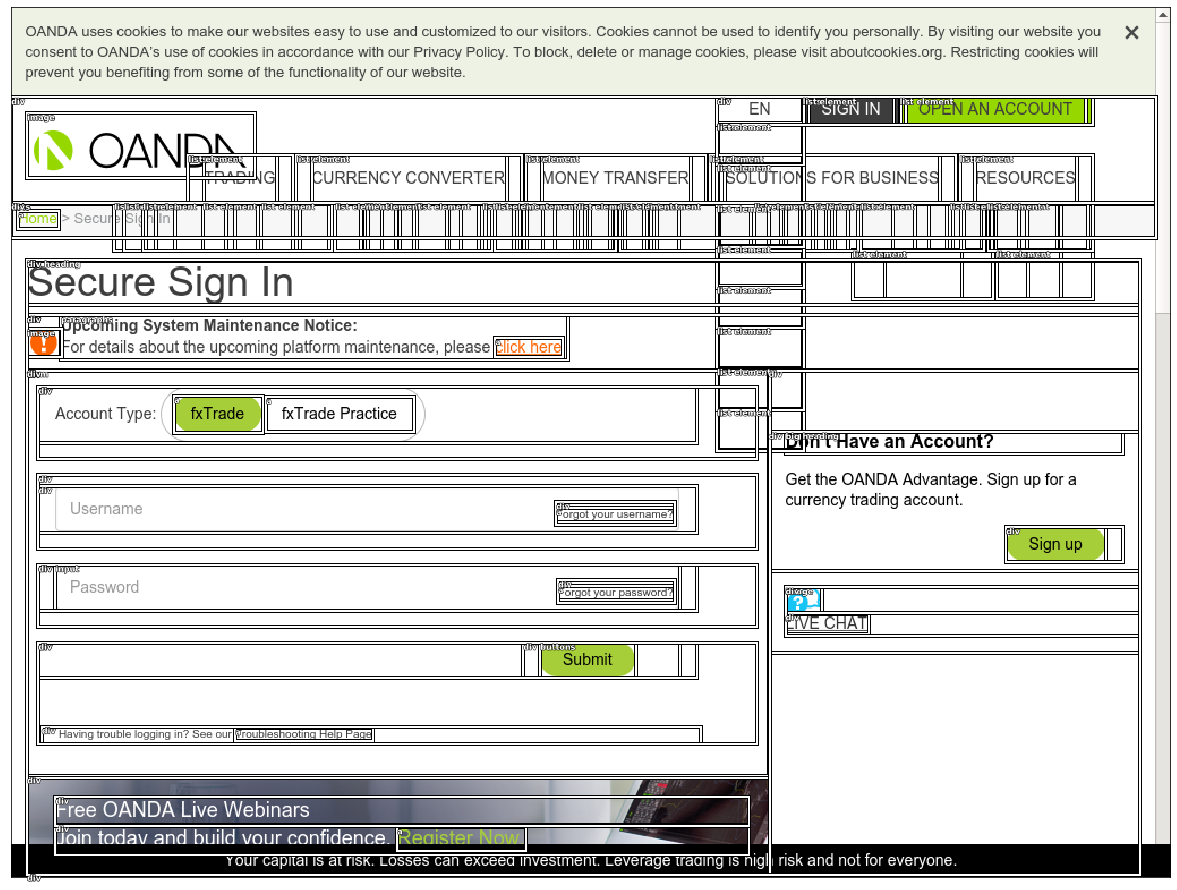

In [79]:
draw_idx(6, trn_anno, trn_fns, cats, jpgs)

torch.Size([3, 768, 1024])


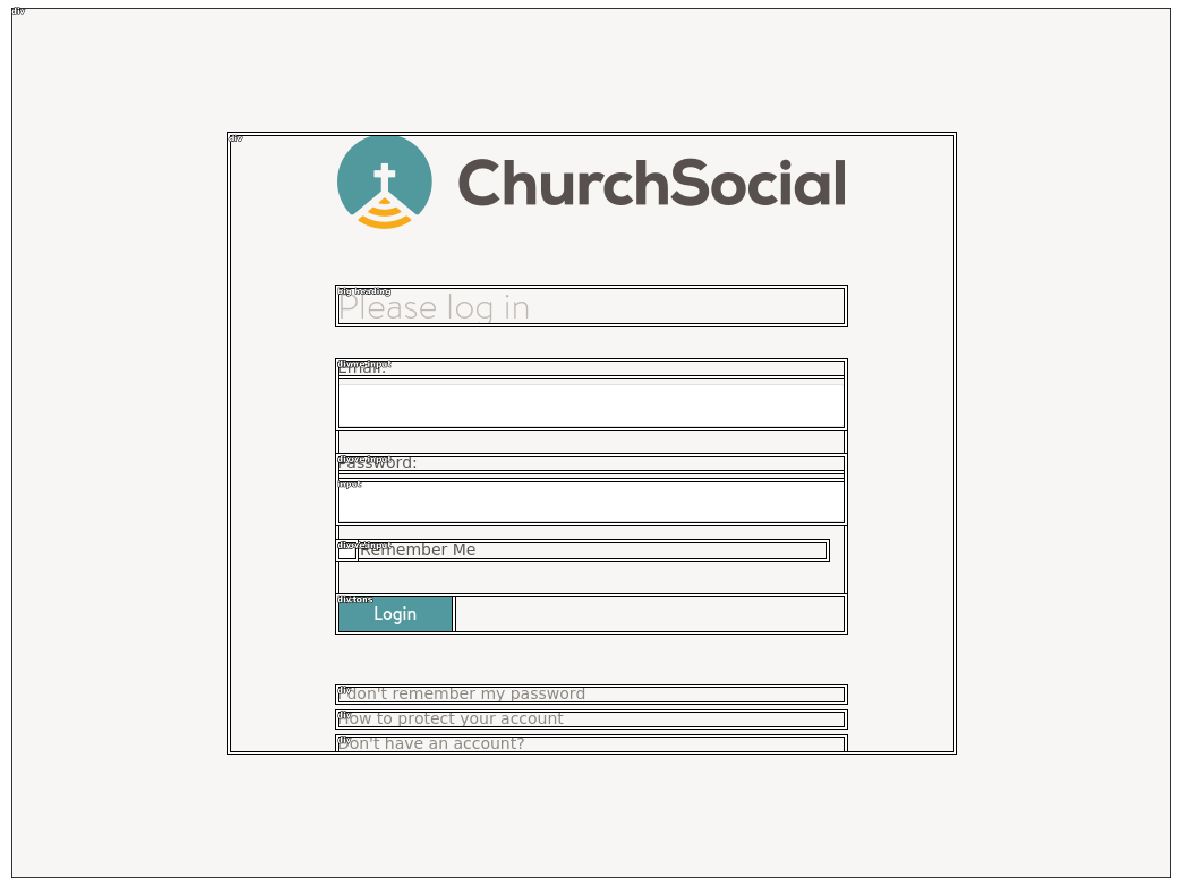

In [80]:
draw_idx(7, trn_anno, trn_fns, cats, jpgs)

torch.Size([3, 768, 1024])


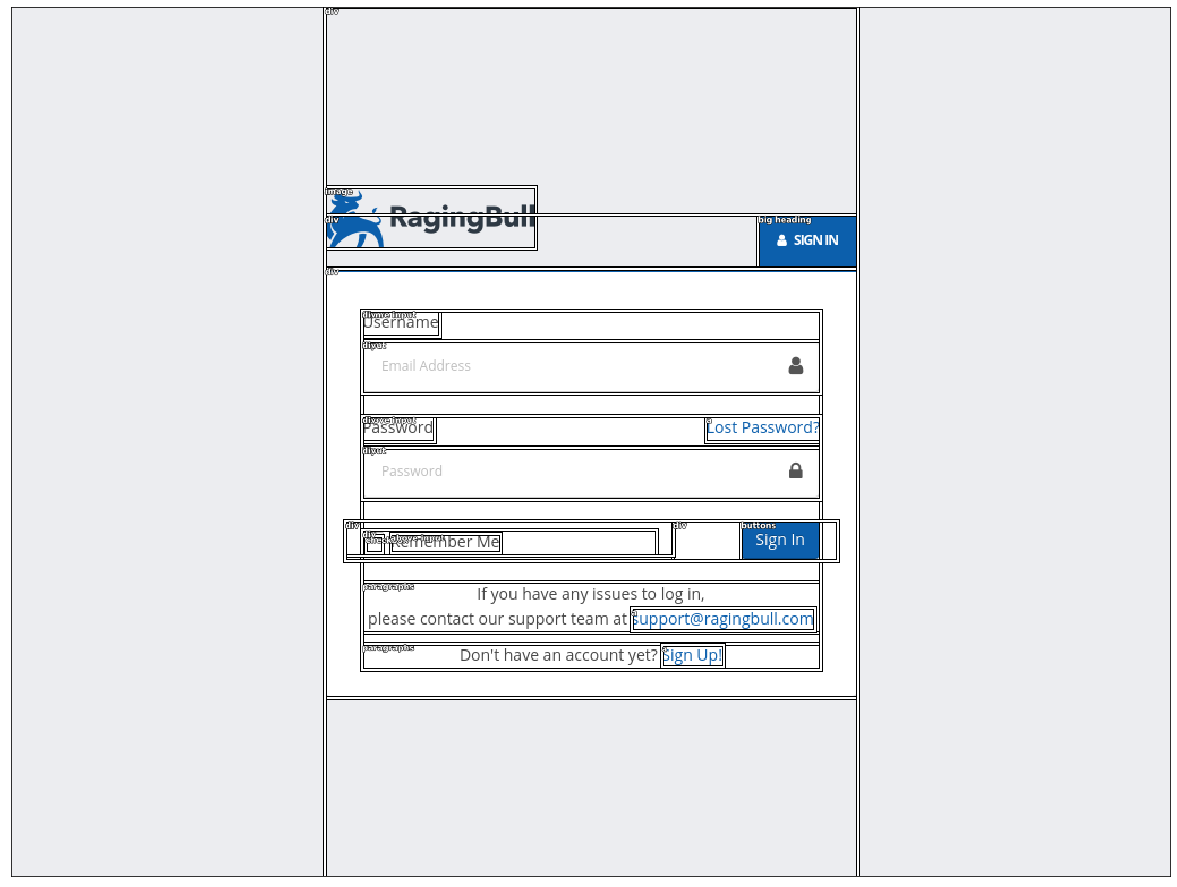

In [81]:
draw_idx(8, trn_anno, trn_fns, cats, jpgs)